# Challenge Básico: Introducción a PySpark y Koalas

PÉREZ ROSAS LUIS ALFREDO MCD UDG 2025-B GRUPO 2

In [1]:
import sys
sys.executable

'c:\\Users\\alfre\\anaconda3\\envs\\ProcessBigData25B\\python.exe'

In [2]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib as plt
import seaborn as sns

c:\Users\alfre\anaconda3\envs\ProcessBigData25B\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Challenge1')\
        .getOrCreate()

In [ ]:
gt = spark.read.csv('data/globalterrorismdb_0718dist.csv', 
                       inferSchema = True, 
                       header = True)

In [5]:
gt.show(5)

+------------+-----+------+----+----------+--------+----------+-------+------------------+------+--------------------+---------+-------------+---------+----------+-----------+--------+--------+-------+-----+-----+-----+---------+-----------+---------------+--------+-------+-------+-----------+--------------------+-----------+---------------+-----------+---------------+---------+--------------------+------------+--------------------+--------------------+--------------------+-------+------------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+-----+-------+-------+-----------+--------------------+--------+------+---------+------+---------+------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+-------------+------------+--------------------+---------+---------

In [43]:
df = gt.toPandas()

In [7]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,...,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,...,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,...,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,...,None,None,None,None,PGIS,-9,-9,1,1,None
4,197001000003,1970,1,0,None,0,None,101,Japan,4,...,None,None,None,None,PGIS,-9,-9,1,1,None


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(3), int32(7), int64(1), object(124)
memory usage: 182.3+ MB


In [9]:
print(f"Dimensiones del DataFrame: {df.shape}")

Dimensiones del DataFrame: (181691, 135)


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000


In [11]:
# Conteo de valores nulos por columna
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
INT_LOG        26853
INT_IDEO       33185
INT_MISC        8094
INT_ANY         1851
related        84106
Length: 122, dtype: int64

Text(0.5, 1.0, 'Número de Incidentes Terroristas por Año')

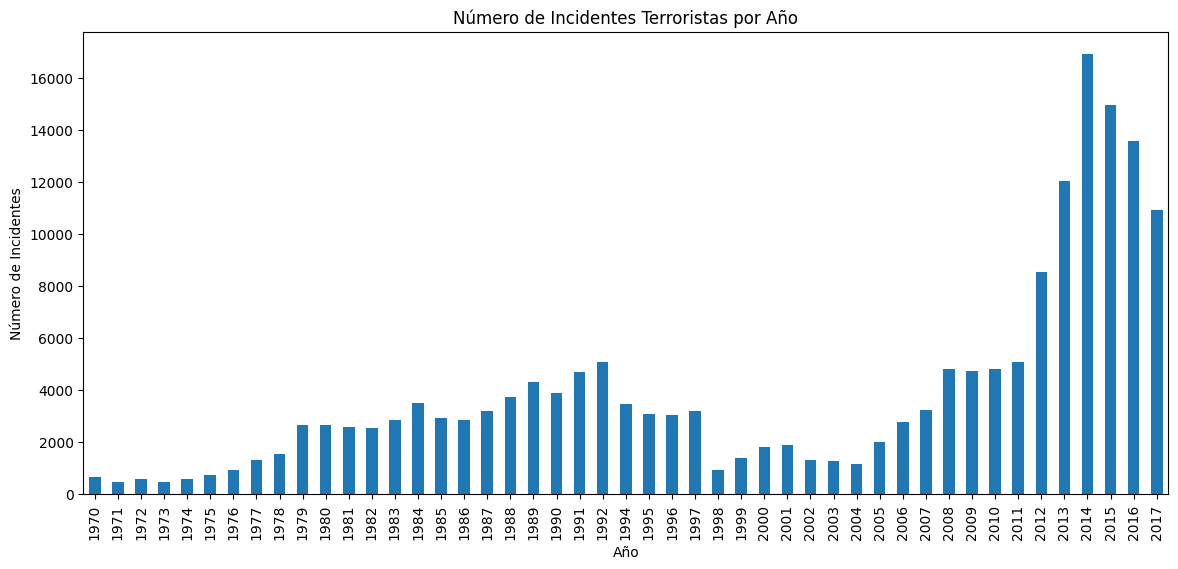

In [12]:
# Graficamos la cantidad de incidentes terroristas por año.

ax = df['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6))
ax.set_xlabel("Año")
ax.set_ylabel("Número de Incidentes")
ax.set_title("Número de Incidentes Terroristas por Año")

Text(0.5, 1.0, 'Top 10 Países con Mayor Número de Incidentes')

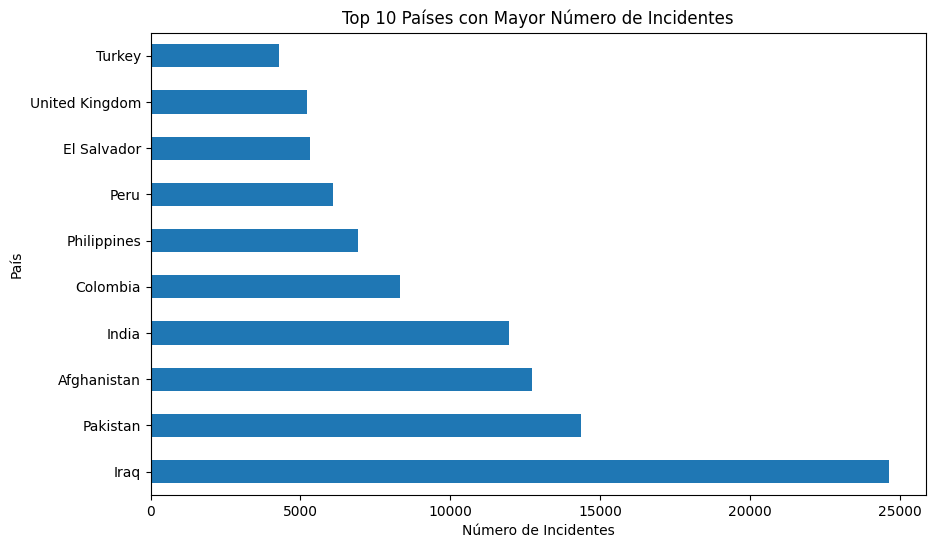

In [13]:
# Graficamos los diez países con más incidentes reportados.

ax = df['country_txt'].value_counts().head(10).plot(kind='barh', figsize=(10, 6))
ax.set_xlabel("Número de Incidentes")
ax.set_ylabel("País")
ax.set_title("Top 10 Países con Mayor Número de Incidentes")


In [14]:
# Convertir 'nkill' a numérico, manejando errores
df['nkill'] = ps.to_numeric(df['nkill'], errors='coerce')

# Verificar que los valores no numéricos se han convertido a NaN
print(f"Valores nulos en 'nkill' después de la conversión: {df['nkill'].isna().sum()}")


Valores nulos en 'nkill' después de la conversión: 11074


Text(0.5, 1.0, 'Número de Muertes por Tipo de Ataque')

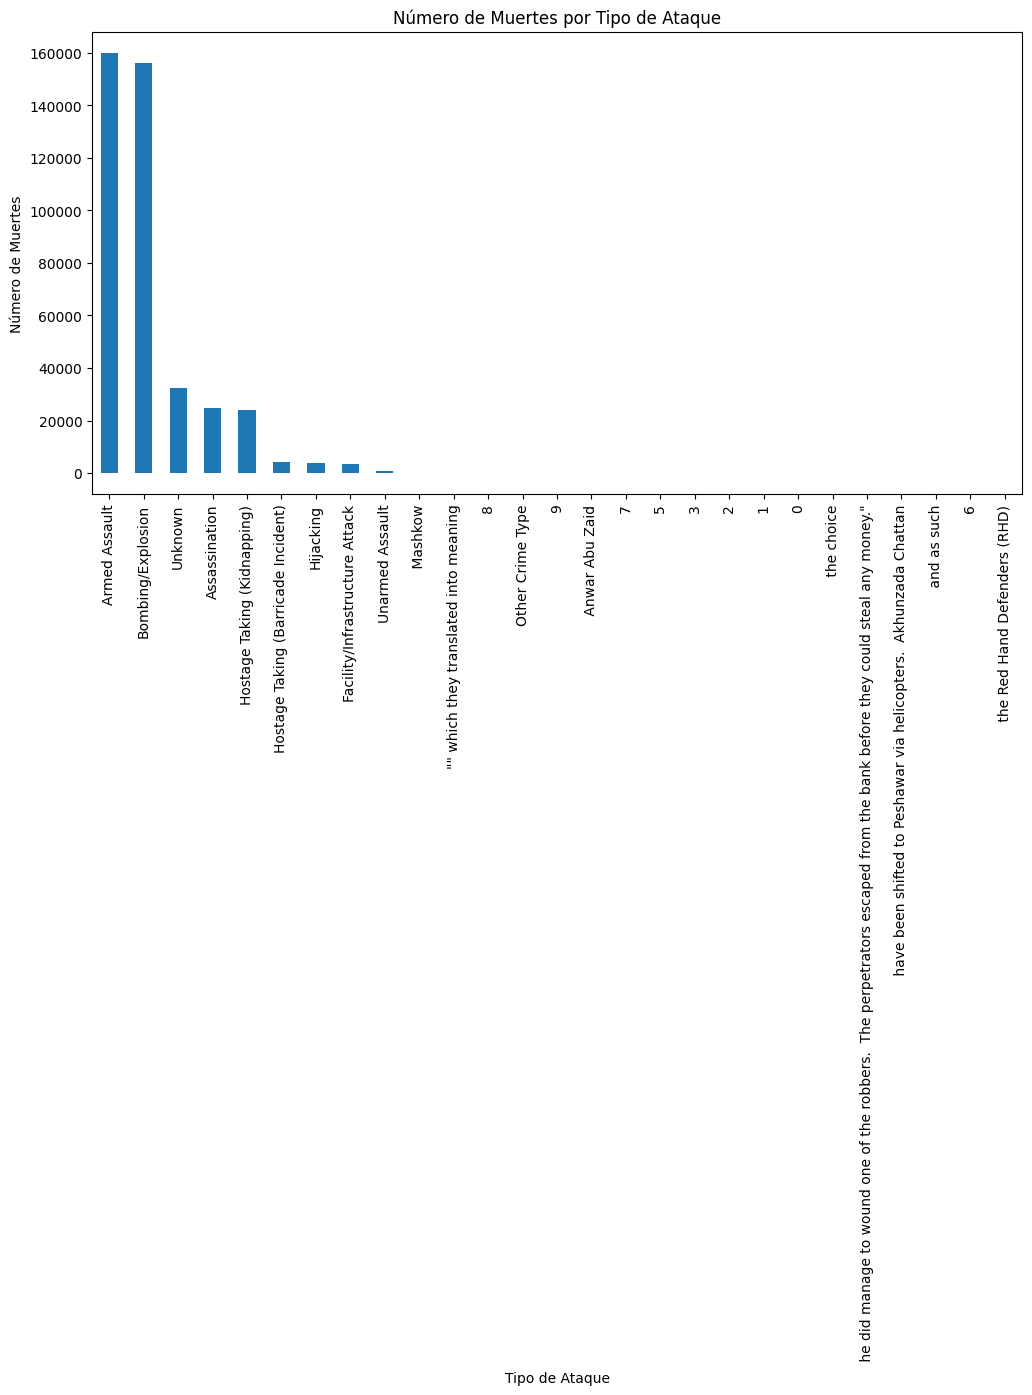

In [15]:
# Agrupar por tipo de ataque y sumar los valores de 'nkill'

ax = df.groupby('attacktype1_txt')['nkill'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
ax.set_xlabel("Tipo de Ataque")
ax.set_ylabel("Número de Muertes")
ax.set_title("Número de Muertes por Tipo de Ataque")

In [16]:
# Parar la sesión de Spark
spark.stop()